In [1]:
import pandas as pd

data = pd.read_csv("station_data_dataverse.csv")

In [2]:
# Calculate the percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a new DataFrame to display the missing percentage
missing_info = pd.DataFrame({'Column': data.columns, 'Missing Percentage': missing_percentage})

In [3]:
# Drop columns with a high percentage of missing values

# Set a threshold (for example, 30%)
threshold = 30

# Drop columns with a percentage of missing values above the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index
CleanData = data.drop(columns=columns_to_drop)

In [4]:
#describe data
data[['kwhTotal','dollars','startTime','endTime','chargeTimeHrs','distance']].describe()

,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000
mean,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378
std,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571
min,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911
25%,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871
50%,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826
75%,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053
max,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292


In [5]:
# Display unique values and counts for a categorical column
unique_values_counts = CleanData['kwhTotal'].value_counts()

In [6]:
#Day 3
#Is there multiple answers from the same user ?
# Check for duplicate values in the 'userid' column
duplicates = data['userId'].duplicated()

In [7]:
# Create a boolean mask for duplicate values in the 'user_id' column
duplicates_mask = data['userId'].duplicated()

# Get a list of duplicate values in the 'user_id' column
duplicate_values = data['userId'][duplicates_mask].tolist()

In [8]:
#there is several entries from the same user Id so I want to know if it charges the car all the time at the same weekday.

# Group by 'user_id' and 'weekday' and count the occurrences
user_weekday_counts = data.groupby(['userId', 'weekday']).size().reset_index(name='count')

In [9]:
# Group by 'userId' and 'weekday' and calculate the average occurrences
user_weekday_avg = data.groupby(['userId', 'weekday']).size().groupby('weekday').mean().reset_index(name='avg_count')

# Display the contents of the user_weekday_avg DataFrame
print(user_weekday_avg.head())

  weekday  avg_count
0     Fri   8.714286
1     Mon   9.625000
2     Sat   7.750000
3     Sun   6.000000
4     Thu   9.932432


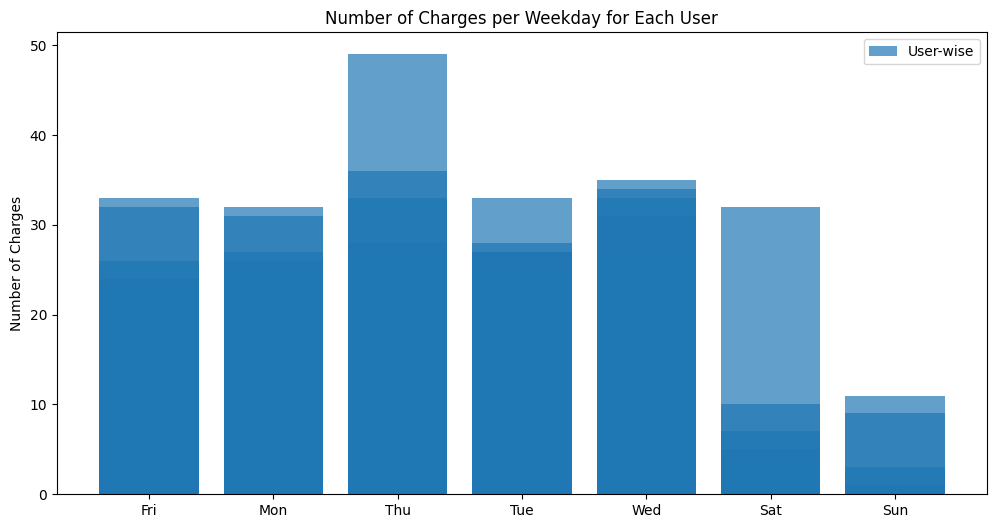

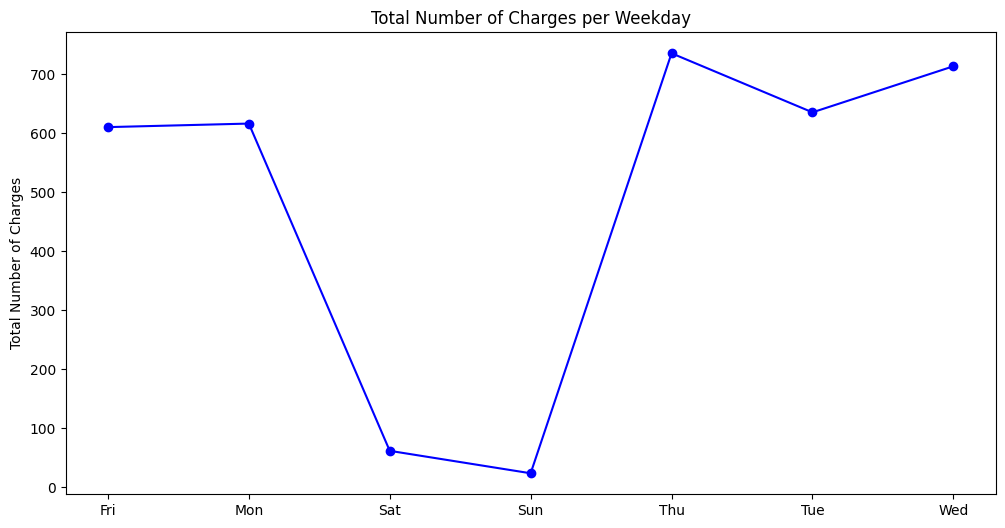

In [10]:
import matplotlib.pyplot as plt


# Group by 'weekday' and calculate the total count of occurrences
total_weekday_counts = data.groupby('weekday').size().reset_index(name='total_count')

# Create a bar plot for user_weekday_counts
plt.figure(figsize=(12, 6))
plt.bar(user_weekday_counts['weekday'], user_weekday_counts['count'], alpha=0.7, label='User-wise')
plt.title('Number of Charges per Weekday for Each User')
plt.ylabel('Number of Charges')
plt.legend()
plt.show()

# Create a line plot for total_weekday_counts
plt.figure(figsize=(12, 6))
plt.plot(total_weekday_counts['weekday'], total_weekday_counts['total_count'], marker='o', linestyle='-', color='b')
plt.title('Total Number of Charges per Weekday')
plt.ylabel('Total Number of Charges')
plt.show()


In [11]:
#day4
# Average number of time it charges
average_charge_time = data['chargeTimeHrs'].mean()

print(f"Average Charge Time: {average_charge_time} hours")

Average Charge Time: 2.8414876452270987 hours


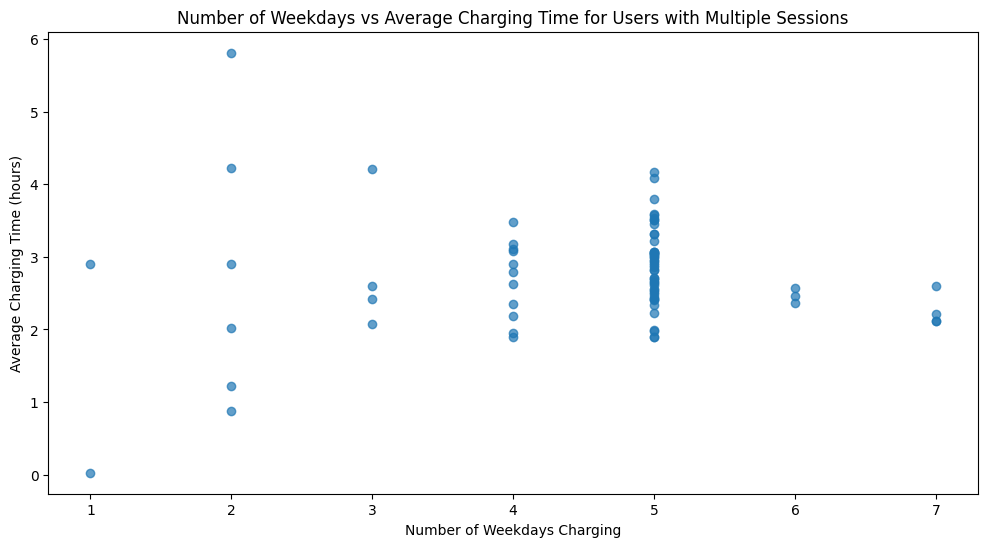

In [12]:
### import pandas as pd
import matplotlib.pyplot as plt

# Check for multiple charging sessions per user
user_counts = data['userId'].value_counts()

# Filter users with multiple charging sessions
multiple_session_users = user_counts[user_counts > 1].index

# Create a DataFrame for users with multiple sessions
multiple_sessions_df = data[data['userId'].isin(multiple_session_users)]

# Group by user and calculate the number of weekdays they charge and average charging time
user_weekday_stats = multiple_sessions_df.groupby('userId').agg({
    'weekday': 'nunique',  # Number of unique weekdays
    'chargeTimeHrs': 'mean'  # Average charging time
}).reset_index()

# Scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(user_weekday_stats['weekday'], user_weekday_stats['chargeTimeHrs'], alpha=0.7)
plt.title('Number of Weekdays vs Average Charging Time for Users with Multiple Sessions')
plt.xlabel('Number of Weekdays Charging')
plt.ylabel('Average Charging Time (hours)')
plt.show()

In [13]:
import pandas as pd 
data['startTime'] = pd.to_datetime(data['startTime'])
data['endTime'] = pd.to_datetime(data['endTime'])

In [14]:
time_series = data.set_index('startTime')

In [21]:
# Describe selected columns
description = data[['kwhTotal', 'dollars', 'startTime', 'endTime', 'chargeTimeHrs', 'distance']].describe()

# Define new column names
new_column_names = {
    'kwhTotal': 'Battery Capacity(in kWh)',
    'dollars': 'Total Dollars Costed',
    'chargeTimeHrs': 'Charge Time (in Hours)',
    'distance': 'Distance Covered'
}

# Rename columns in the description DataFrame
description = description.rename(columns=new_column_names)

# Extract median values
median_values = description.loc['50%', ['Battery Capacity(in kWh)', 'Total Dollars Costed', 
                                        'Charge Time (in Hours)', 'Distance Covered']]

print("Median values:")
print(median_values)


Median values:
Battery Capacity(in kWh)         6.23
Total Dollars Costed              0.0
Charge Time (in Hours)       2.808889
Distance Covered            21.023826
Name: 50%, dtype: object
